In [11]:
from mlp_utils import MLP_LM, get_vocab, build_dataset
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
words = open('names.txt').read().splitlines()
stoi, itos = get_vocab(words)

block_size = 5

In [13]:
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))

Xtr, Ytr = build_dataset(words[:n1], stoi, block_size)
Xvl, Yvl = build_dataset(words[n1:], stoi, block_size)

In [14]:
mlp_model = MLP_LM(
    vocab_size=len(stoi),
    context_length=block_size,
    embedding_dim=3,
    hidden_dim=1000,
)

In [15]:
losses = []

Training: 100%|██████████| 10000/10000 [00:13<00:00, 723.10it/s, loss=2.7]


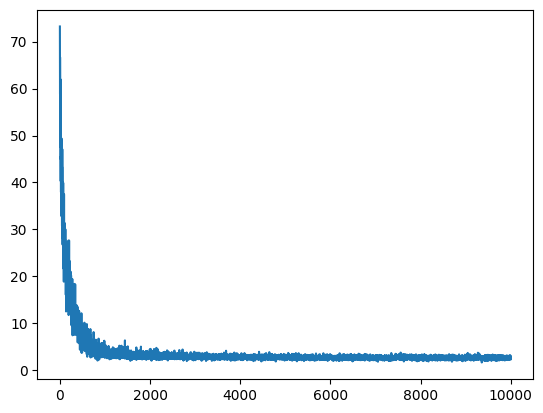

In [16]:
losses = mlp_model.train(
    Xtr = Xtr,
    Ytr = Ytr,
    iterations=10000,
    batch_size=32,
    lr=0.01,
    losses_before=losses)

plt.plot(losses)

In [17]:
mlp_model.evaluate(Xvl, Yvl)

2.6053683757781982

In [18]:
mlp_model.generate(n=10, itos=itos)

['mrynyol',
 'jyolas',
 'dayr',
 'grdtiy',
 'iyor',
 'irili',
 'cafak',
 'adire',
 'ali',
 'hroges']

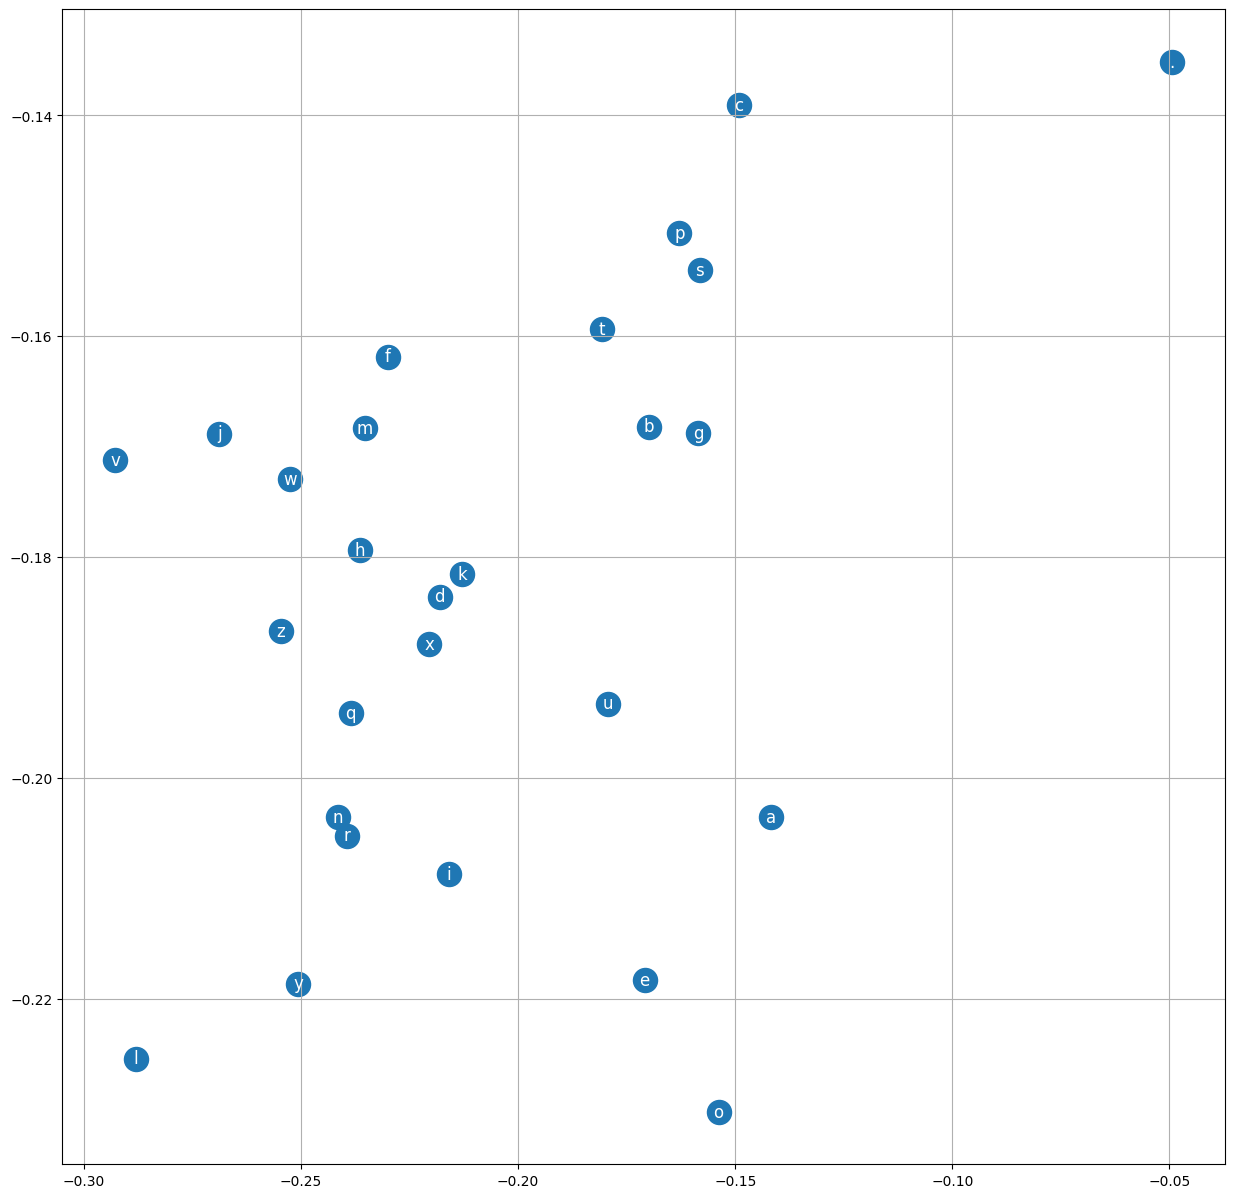

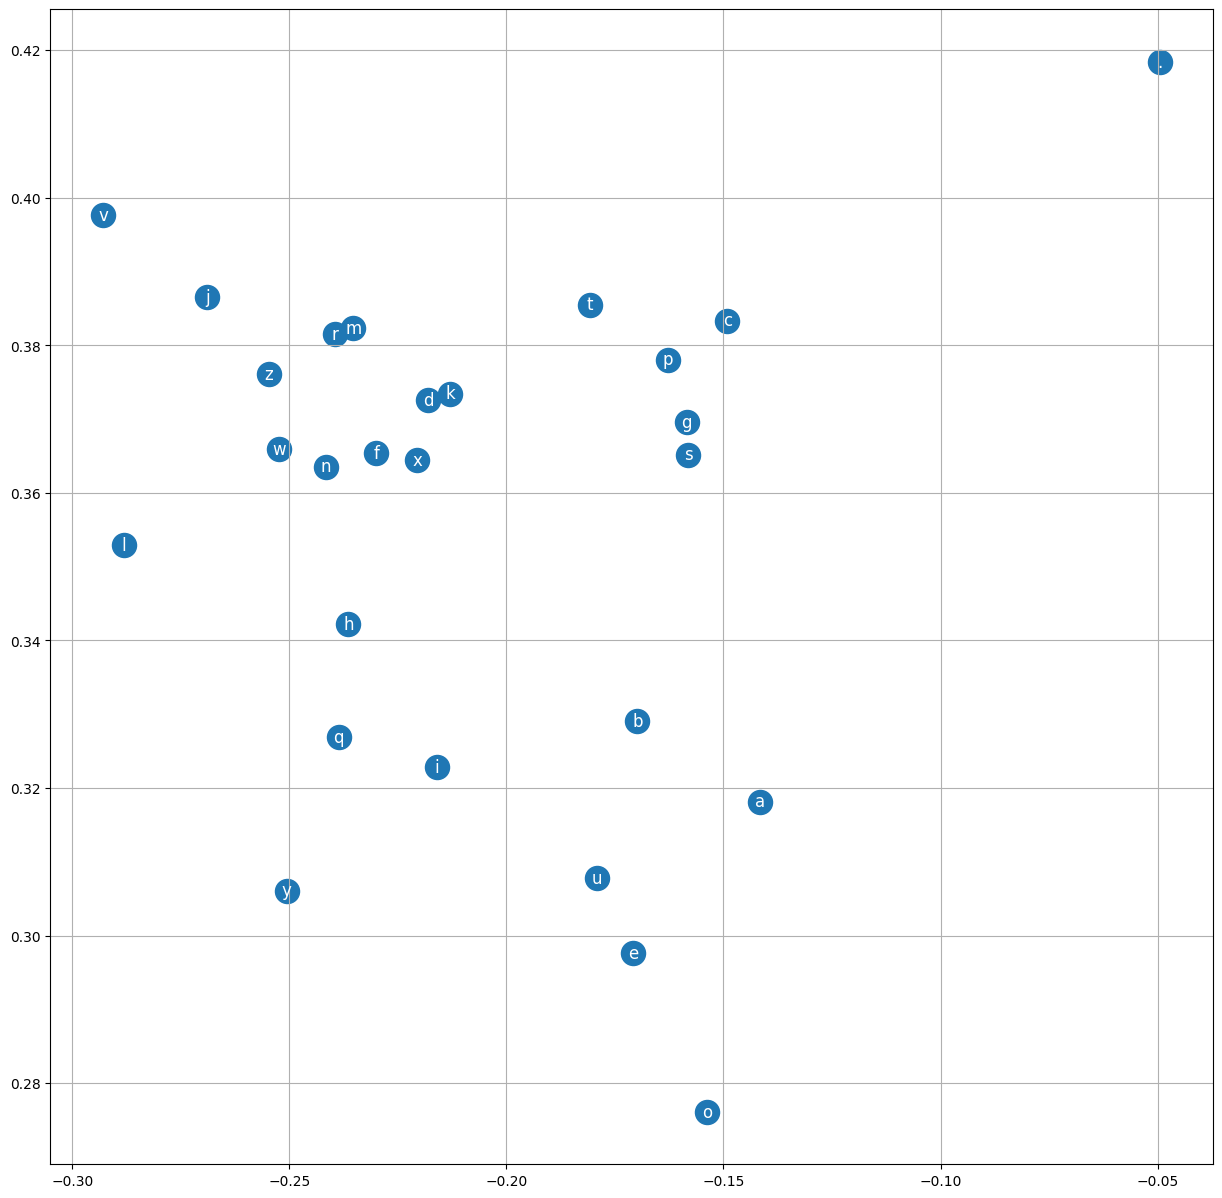

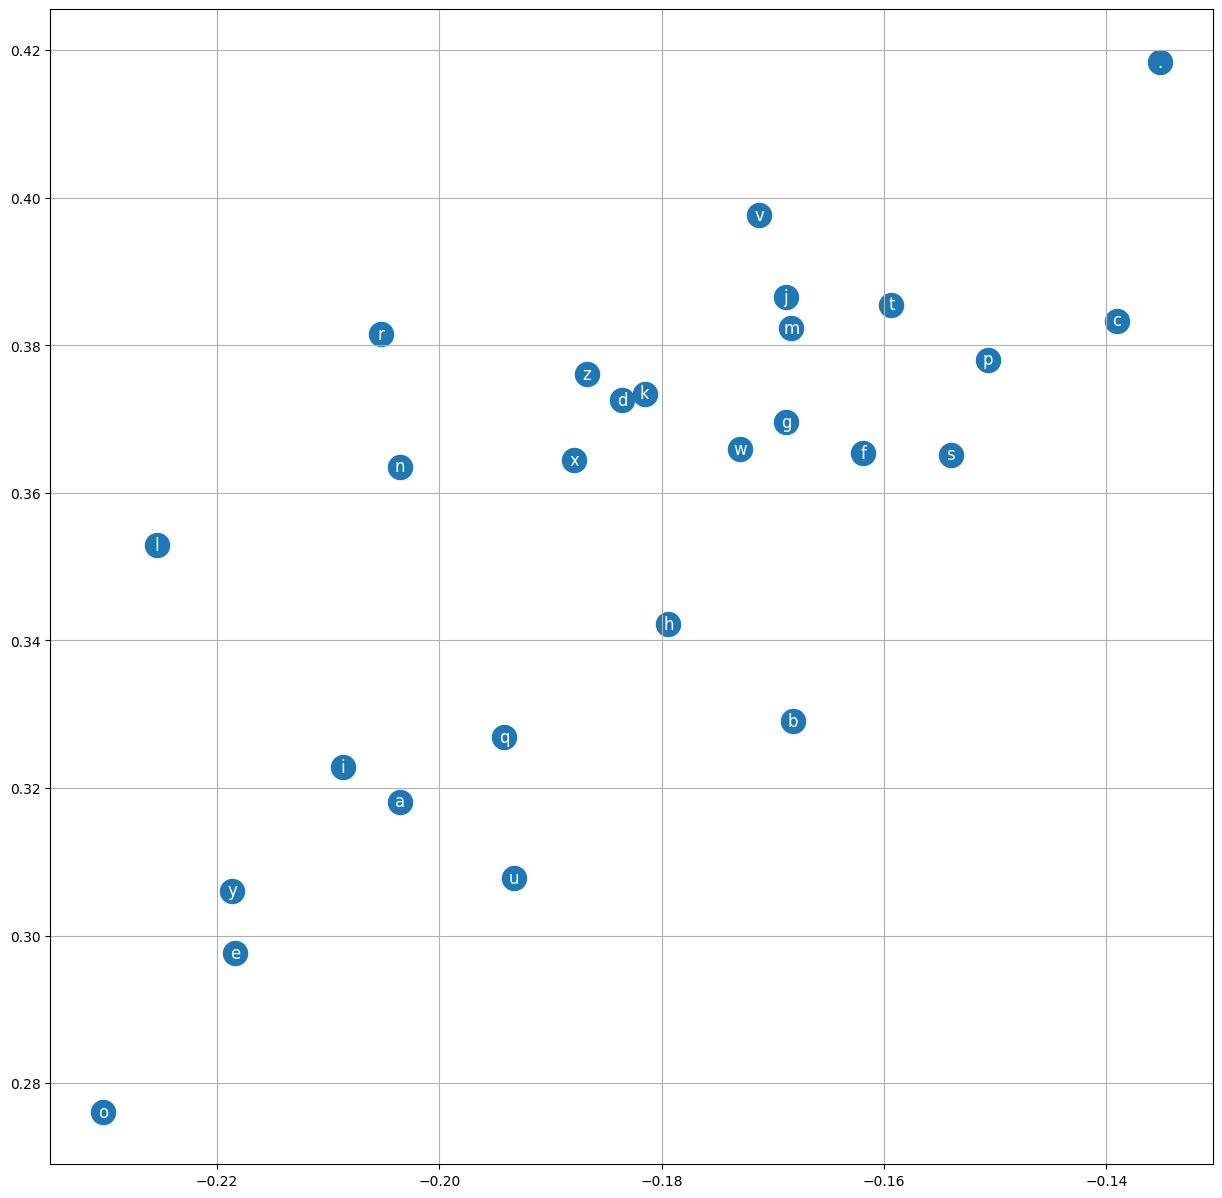

In [20]:
mlp_model.plot_vocab_embedding(itos,dim1=0,dim2=1)
mlp_model.plot_vocab_embedding(itos,dim1=0,dim2=2)
mlp_model.plot_vocab_embedding(itos,dim1=1,dim2=2)